<a href="https://colab.research.google.com/github/Ransaka/FaceDetector/blob/master/prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]

In [ ]:
import os
data_path = os.path.join('F:\Kaggle\DataStorm\data-storm-20\cleaned data')

In [ ]:
os.listdir(data_path)

['cleaned datacleaned_test.csv',
 'cleaned datacleaned_validate.csv',
 'cleaned_test4000row.csv']

In [ ]:
train = pd.read_csv(data_path+'/cleaned_test4000row.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                4318 non-null   int64 
 1   Reservation-id            4318 non-null   int64 
 2   Gender                    4318 non-null   object
 3   Age                       4318 non-null   int64 
 4   Ethnicity                 4318 non-null   object
 5   Educational_Level         4318 non-null   object
 6   Income                    4318 non-null   object
 7   Country_region            4318 non-null   object
 8   Hotel_Type                4318 non-null   object
 9   Adults                    4318 non-null   int64 
 10  Children                  4318 non-null   int64 
 11  Babies                    4318 non-null   int64 
 12  Meal_Type                 4318 non-null   object
 13  Visted_Previously         4318 non-null   object
 14  Previous_Cancellations  

In [ ]:
# train.head()

In [ ]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
cols_to_drop = ['Educational_Level','Ethnicity','Expected_checkin_Month','Gender','Hotel_Type','Required_Car_Parking','Adults','Children','Age']

In [ ]:
df = train.drop(cols_to_drop,1)

In [ ]:
df.dtypes

Reservation-id               int64
Income                      object
Country_region              object
Babies                       int64
Meal_Type                   object
Visted_Previously           object
Previous_Cancellations      object
Deposit_type                object
Booking_channel             object
Use_Promotion               object
Discount_Rate                int64
Room_Rate                    int64
Expected_checkin_Year        int64
expected_days_of_checkin     int64
booked_before_n_days         int64
isWeekend_trip               int64
dtype: object

In [ ]:
numaric_cols = ['Age','Adults','Children','Babies','Discount_Rate','Room_Rate','Expected_checkin_Year','Expected_checkin_Month','expected_days_of_checkin','booked_before_n_days','isWeekend_trip']

array([[<AxesSubplot:title={'center':'Reservation-id'}>,
        <AxesSubplot:title={'center':'Babies'}>,
        <AxesSubplot:title={'center':'Discount_Rate'}>],
       [<AxesSubplot:title={'center':'Room_Rate'}>,
        <AxesSubplot:title={'center':'Expected_checkin_Year'}>,
        <AxesSubplot:title={'center':'expected_days_of_checkin'}>],
       [<AxesSubplot:title={'center':'booked_before_n_days'}>,
        <AxesSubplot:title={'center':'isWeekend_trip'}>, <AxesSubplot:>]],
      dtype=object)

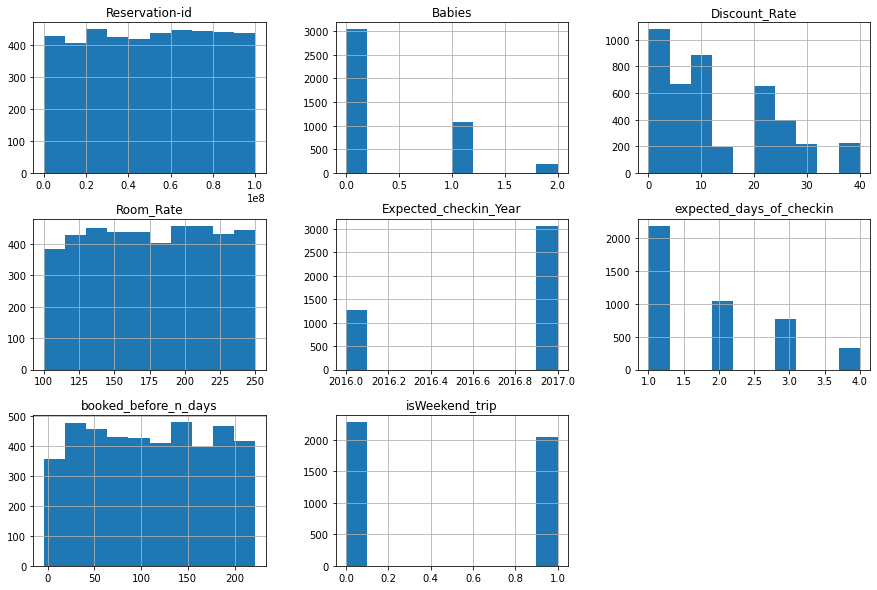

In [ ]:
df.hist()

<AxesSubplot:>

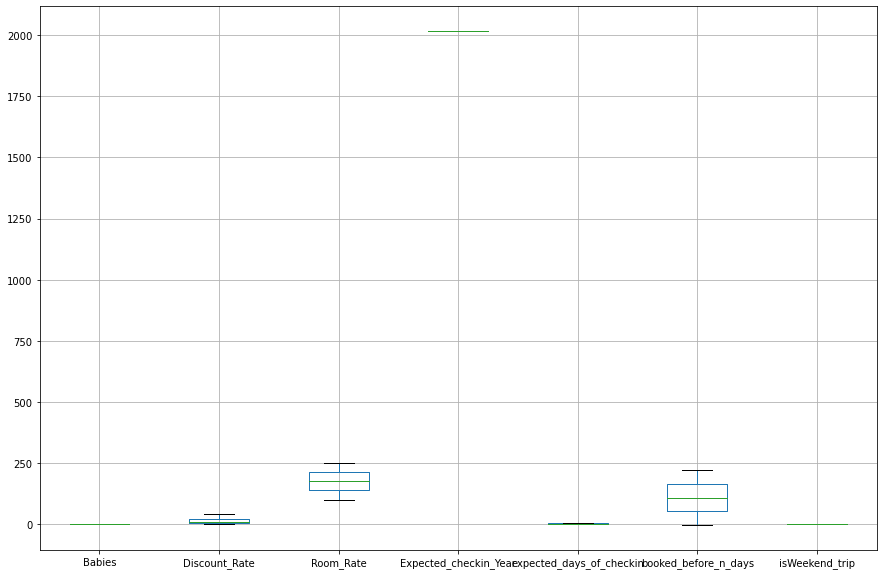

In [ ]:
df.drop(['Reservation-id'],1).boxplot()

In [ ]:
from scipy.stats import boxcox,yeojohnson

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer

In [ ]:
# numaric_cols

In [ ]:
# numaric_df = train[numaric_cols]

In [ ]:
std_scaler = MinMaxScaler(feature_range=(0.01,1))

In [ ]:
# featur_df = df['Reservation_Status']

In [ ]:
df_bkp = df.copy()

In [ ]:
# train

In [ ]:
# df = df.backup

,Reservation-id,Income,Country_region,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,62931593,25K --50K,South,0,HB,No,No,No Deposit,Direct,Yes,10,153,2016,1,21,1
1,70586099,25K --50K,East,0,FB,No,No,No Deposit,Online,No,0,210,2016,1,104,1
2,4230648,<25K,East,0,BB,No,No,No Deposit,Agent,Yes,5,117,2017,3,20,1
3,25192322,25K --50K,South,2,FB,No,No,No Deposit,Online,Yes,10,107,2016,2,182,1
4,80931528,25K --50K,South,0,BB,No,No,Refundable,Agent,No,0,119,2016,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,50K -- 100K,South,1,FB,Yes,No,Non-Refundable,Online,No,0,153,2017,1,199,0
4314,5496554,50K -- 100K,South,0,HB,No,No,Refundable,Agent,Yes,40,233,2017,3,47,0
4315,59004046,<25K,East,0,FB,No,No,No Deposit,Direct,No,0,242,2017,1,215,0
4316,65838682,25K --50K,West,1,BB,No,No,No Deposit,Online,No,0,208,2017,1,25,0


In [ ]:
df = pd.get_dummies(df.drop(['Reservation-id'],1))

In [ ]:
# df = df[df.booked_before_n_days.apply(lambda x: True if x<220 else False)]

In [ ]:
scaled_df = pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)

In [ ]:
scaled_df

,Babies,Discount_Rate,Room_Rate,Expected_checkin_Year,expected_days_of_checkin,booked_before_n_days,isWeekend_trip,Income_25K --50K,Income_50K -- 100K,Income_<25K,...,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Use_Promotion_No,Use_Promotion_Yes
0,0.010,0.25750,0.3598,0.01,0.01,0.119513,1.00,1.00,0.01,0.01,...,1.0,0.01,1.00,0.01,0.01,0.01,1.00,0.01,0.01,1.00
1,0.010,0.01000,0.7360,0.01,0.01,0.483097,1.00,1.00,0.01,0.01,...,1.0,0.01,1.00,0.01,0.01,0.01,0.01,1.00,1.00,0.01
2,0.010,0.13375,0.1222,1.00,0.67,0.115133,1.00,0.01,0.01,1.00,...,1.0,0.01,1.00,0.01,0.01,1.00,0.01,0.01,0.01,1.00
3,1.000,0.25750,0.0562,0.01,0.34,0.824779,1.00,1.00,0.01,0.01,...,1.0,0.01,1.00,0.01,0.01,0.01,0.01,1.00,0.01,1.00
4,0.010,0.01000,0.1354,0.01,0.34,0.106372,1.00,1.00,0.01,0.01,...,1.0,0.01,0.01,0.01,1.00,1.00,0.01,0.01,1.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,0.505,0.01000,0.3598,1.00,0.01,0.899248,0.01,0.01,1.00,0.01,...,1.0,0.01,0.01,1.00,0.01,0.01,0.01,1.00,1.00,0.01
4314,0.010,1.00000,0.8878,1.00,0.67,0.233407,0.01,0.01,1.00,0.01,...,1.0,0.01,0.01,0.01,1.00,1.00,0.01,0.01,0.01,1.00
4315,0.010,0.01000,0.9472,1.00,0.01,0.969336,0.01,0.01,0.01,1.00,...,1.0,0.01,1.00,0.01,0.01,0.01,1.00,0.01,1.00,0.01
4316,0.505,0.01000,0.7228,1.00,0.01,0.137035,0.01,1.00,0.01,0.01,...,1.0,0.01,1.00,0.01,0.01,0.01,0.01,1.00,1.00,0.01


In [ ]:
# scaled_df[scaled_df.booked_before_n_days.apply(lambda x: True if x<220 else False)]

array([[<AxesSubplot:title={'center':'Babies'}>,
        <AxesSubplot:title={'center':'Discount_Rate'}>,
        <AxesSubplot:title={'center':'Room_Rate'}>,
        <AxesSubplot:title={'center':'Expected_checkin_Year'}>,
        <AxesSubplot:title={'center':'expected_days_of_checkin'}>],
       [<AxesSubplot:title={'center':'booked_before_n_days'}>,
        <AxesSubplot:title={'center':'isWeekend_trip'}>,
        <AxesSubplot:title={'center':'Income_25K --50K'}>,
        <AxesSubplot:title={'center':'Income_50K -- 100K'}>,
        <AxesSubplot:title={'center':'Income_<25K'}>],
       [<AxesSubplot:title={'center':'Income_>100K'}>,
        <AxesSubplot:title={'center':'Country_region_East'}>,
        <AxesSubplot:title={'center':'Country_region_North'}>,
        <AxesSubplot:title={'center':'Country_region_South'}>,
        <AxesSubplot:title={'center':'Country_region_West'}>],
       [<AxesSubplot:title={'center':'Meal_Type_BB'}>,
        <AxesSubplot:title={'center':'Meal_Type_FB'}>,


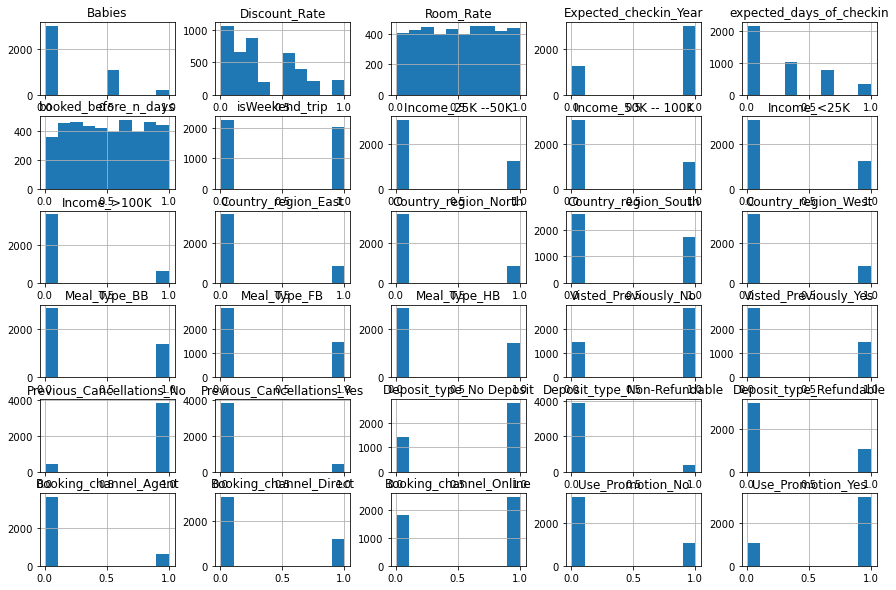

In [ ]:
scaled_df.hist()

<AxesSubplot:>

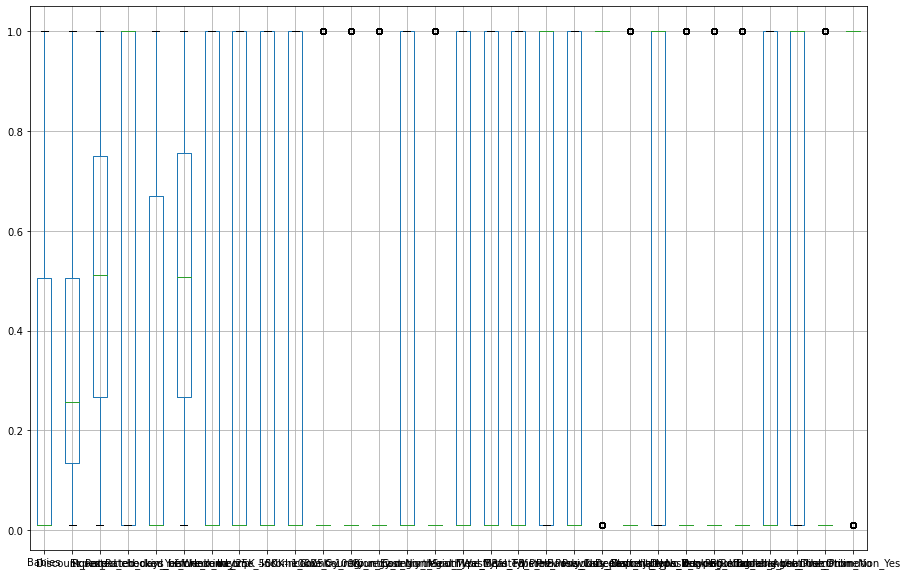

In [ ]:
scaled_df.boxplot()

<AxesSubplot:>

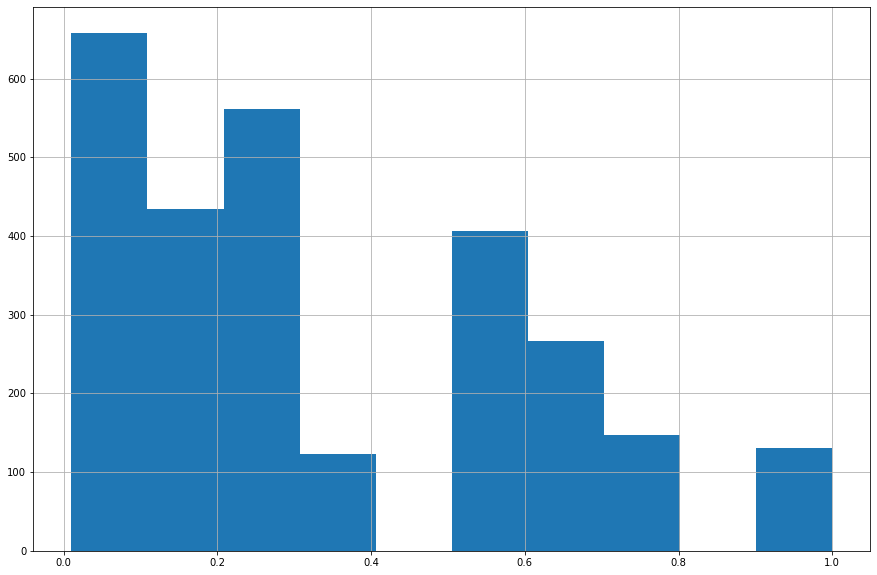

In [ ]:
scaled_df.Discount_Rate.hist()

In [ ]:
q_trans = QuantileTransformer()

In [ ]:
discount_data = yeojohnson(x=scaled_df.Discount_Rate,lmbda=0.2)

(array([1077.,  669.,  884.,  198.,    0.,  650.,  398.,  217.,    0.,
         225.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <BarContainer object of 10 artists>)

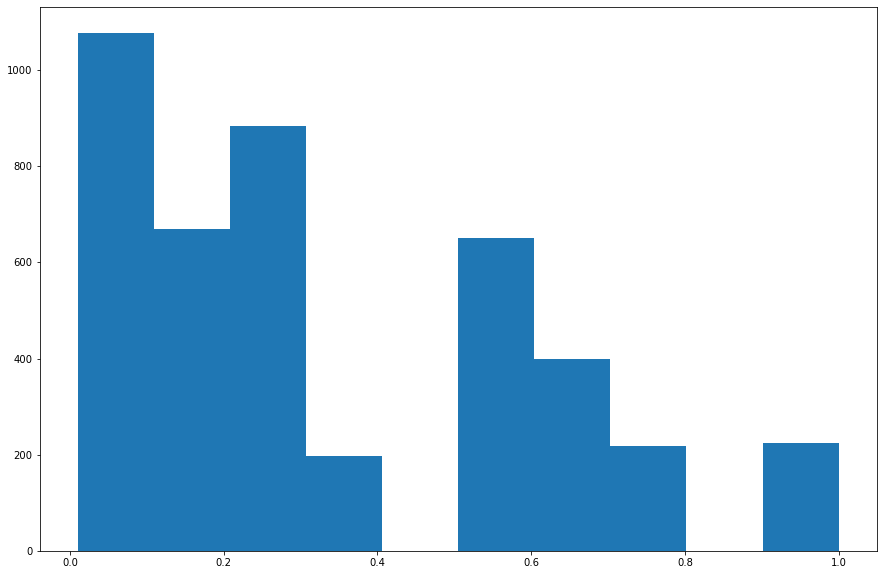

In [ ]:
plt.hist(scaled_df.Discount_Rate)

<AxesSubplot:>

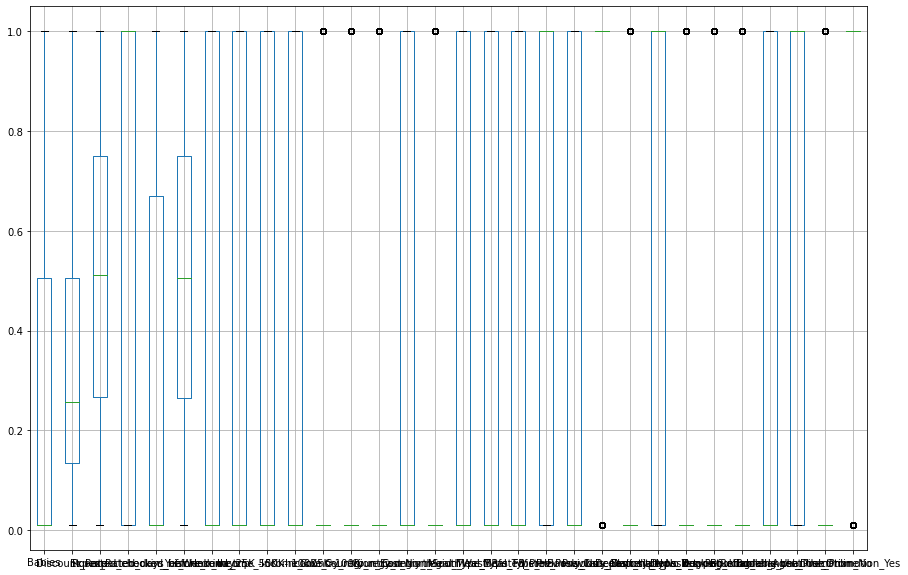

In [ ]:
scaled_df.boxplot()

In [ ]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(scaled_df),columns=scaled_df.columns)

In [ ]:
# train = train[train.booked_before_n_days.apply(lambda x: True if x<220 else False)]

In [ ]:
scaled_df.shape

(4318, 30)

In [ ]:
train.shape

(4318, 25)

In [ ]:
scaled_df['Reservation-id']=train['Reservation-id']

In [ ]:
# scaled_df['Reservation_Status'] = train['Reservation_Status']

In [ ]:
# train.columns

In [ ]:
train.dtypes

Reservation-id               int64
Gender                      object
Age                          int64
Ethnicity                   object
Educational_Level           object
Income                      object
Country_region              object
Hotel_Type                  object
Adults                       int64
Children                     int64
Babies                       int64
Meal_Type                   object
Visted_Previously           object
Previous_Cancellations      object
Deposit_type                object
Booking_channel             object
Required_Car_Parking        object
Use_Promotion               object
Discount_Rate                int64
Room_Rate                    int64
Expected_checkin_Year        int64
Expected_checkin_Month       int64
expected_days_of_checkin     int64
booked_before_n_days         int64
isWeekend_trip               int64
dtype: object

In [ ]:
scaled_df

,Babies,Discount_Rate,Room_Rate,Expected_checkin_Year,expected_days_of_checkin,booked_before_n_days,isWeekend_trip,Income_25K --50K,Income_50K -- 100K,Income_<25K,...,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Use_Promotion_No,Use_Promotion_Yes,Reservation-id
0,-0.61056,-0.214515,-0.525703,-1.559626,-0.841740,-1.379968,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.307490,-0.575033,-0.410232,1.598096,-1.162141,-0.576459,0.576459,62931593
1,-0.61056,-1.102178,0.801829,-1.559626,-0.841740,-0.090048,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.307490,-0.575033,-0.410232,-0.625745,0.860481,1.734729,-1.734729,70586099
2,-0.61056,-0.658347,-1.364145,0.641179,1.208250,-1.395509,1.058198,-0.636148,-0.625386,1.586281,...,-0.339391,0.709565,-0.307490,-0.575033,2.437647,-0.625745,-1.162141,-0.576459,0.576459,4230648
3,2.92112,-0.214515,-1.597045,-1.559626,0.183255,1.122167,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.307490,-0.575033,-0.410232,-0.625745,0.860481,-0.576459,0.576459,25192322
4,-0.61056,-1.102178,-1.317565,-1.559626,0.183255,-1.426592,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,-1.409315,-0.307490,1.739032,2.437647,-0.625745,-1.162141,1.734729,-1.734729,80931528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,1.15528,-1.102178,-0.525703,0.641179,-0.841740,1.386367,-0.945002,-0.636148,1.599011,-0.630405,...,-0.339391,-1.409315,3.252139,-0.575033,-0.410232,-0.625745,0.860481,1.734729,-1.734729,39110574
4314,-0.61056,2.448474,1.337500,0.641179,1.208250,-0.975897,-0.945002,-0.636148,1.599011,-0.630405,...,-0.339391,-1.409315,-0.307490,1.739032,2.437647,-0.625745,-1.162141,-0.576459,0.576459,5496554
4315,-0.61056,-1.102178,1.547110,0.641179,-0.841740,1.635027,-0.945002,-0.636148,-0.625386,1.586281,...,-0.339391,0.709565,-0.307490,-0.575033,-0.410232,1.598096,-1.162141,1.734729,-1.734729,59004046
4316,1.15528,-1.102178,0.755249,0.641179,-0.841740,-1.317803,-0.945002,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.307490,-0.575033,-0.410232,-0.625745,0.860481,1.734729,-1.734729,65838682


In [ ]:
scaled_df.head()

,Babies,Discount_Rate,Room_Rate,Expected_checkin_Year,expected_days_of_checkin,booked_before_n_days,isWeekend_trip,Income_25K --50K,Income_50K -- 100K,Income_<25K,...,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Use_Promotion_No,Use_Promotion_Yes,Reservation-id
0,-0.61056,-0.214515,-0.525703,-1.559626,-0.841740,-1.379968,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.30749,-0.575033,-0.410232,1.598096,-1.162141,-0.576459,0.576459,62931593
1,-0.61056,-1.102178,0.801829,-1.559626,-0.841740,-0.090048,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.30749,-0.575033,-0.410232,-0.625745,0.860481,1.734729,-1.734729,70586099
2,-0.61056,-0.658347,-1.364145,0.641179,1.208250,-1.395509,1.058198,-0.636148,-0.625386,1.586281,...,-0.339391,0.709565,-0.30749,-0.575033,2.437647,-0.625745,-1.162141,-0.576459,0.576459,4230648
3,2.92112,-0.214515,-1.597045,-1.559626,0.183255,1.122167,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,0.709565,-0.30749,-0.575033,-0.410232,-0.625745,0.860481,-0.576459,0.576459,25192322
4,-0.61056,-1.102178,-1.317565,-1.559626,0.183255,-1.426592,1.058198,1.571961,-0.625386,-0.630405,...,-0.339391,-1.409315,-0.30749,1.739032,2.437647,-0.625745,-1.162141,1.734729,-1.734729,80931528


In [ ]:
scaled_df.to_csv('scaled_and_selected_features_test.csv')

## End

In [ ]:
df = scaled_df.copy()

In [ ]:
df = pd.read_csv('scaled_and_selected_features_train.csv')

In [ ]:
X.columns

Index(['Babies', 'Discount_Rate', 'Room_Rate', 'Expected_checkin_Year',
       'expected_days_of_checkin', 'booked_before_n_days', 'isWeekend_trip',
       'Income_25K --50K', 'Income_50K -- 100K', 'Income__25K', 'Income_>100K',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Meal_Type_BB', 'Meal_Type_FB', 'Meal_Type_HB',
       'Visted_Previously_No', 'Visted_Previously_Yes',
       'Previous_Cancellations_No', 'Previous_Cancellations_Yes',
       'Deposit_type_No Deposit', 'Deposit_type_Non-Refundable',
       'Deposit_type_Refundable', 'Booking_channel_Agent',
       'Booking_channel_Direct', 'Booking_channel_Online', 'Use_Promotion_No',
       'Use_Promotion_Yes'],
      dtype='object')

In [ ]:
y =df['Reservation_Status']

In [ ]:
X = df.drop(['Reservation_Status','Reservation-id','Unnamed: 0','isWeekend_trip'],axis=1)

In [ ]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lblEncoder = LabelEncoder()

In [ ]:
y = lblEncoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=100,n_jobs=3,verbose=1)

In [ ]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=10, n_jobs=3, random_state=0, verbose=1)

In [ ]:
clf.score(X_test,y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7915139826422373

## Test

In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
import re
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
import pickle

In [ ]:
model_gb = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,max_depth=5).fit(X_train,y_train)

In [ ]:
model_gb.score(X_test,y_test)

0.7907425265188043

In [ ]:
y_pred = model_gb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   1  698    0]
 [   5 4099    0]
 [   0  382    0]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00       699
           1       0.79      1.00      0.88      4104
           2       0.00      0.00      0.00       382

    accuracy                           0.79      5185
   macro avg       0.32      0.33      0.30      5185
weighted avg       0.65      0.79      0.70      5185

0.7907425265188043


C:\Users\ransa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifiers = [
    KNeighborsClassifier(n_jobs = 4,n_neighbors=3),
    RandomForestClassifier(n_jobs = 4),
    XGBClassifier(n_jobs = 4,importance_type='weight')
]

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print ("Score: ", round(score,3),"\nF1 score: ", round(f1_score(y_test, pred,average='macro'), 3), "\n- - - - - ", "\n")

KNeighborsClassifier
Score:  0.713 
F1 score:  0.349 
- - - - -  

RandomForestClassifier
Score:  0.786 
F1 score:  0.311 
- - - - -  

XGBClassifier
[08:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Score:  0.782 
F1 score:  0.31 
- - - - -  



In [ ]:
for i,j in enumerate([x for x in range(1,20)],start=1):
    knn = KNeighborsClassifier(n_jobs = i,n_neighbors=j).fit(X_train,y_train)
    print(i,j,f1_score(y_test, knn.predict(X_test),average='macro'))

1 1 0.35571749750619036
2 2 0.3347061249056233
3 3 0.34786169748853063
4 4 0.34965017364978723
5 5 0.3339265335566757
6 6 0.3343707550176347
7 7 0.33040876171424616
8 8 0.3248737959752519
9 9 0.32143223817977606
10 10 0.31325858061408707
11 11 0.30869189733050456
12 12 0.3028862302433909
13 13 0.3047455123122644
14 14 0.30526241518736535
15 15 0.3049833667665885
16 16 0.30237918384297524
17 17 0.3054287747136001
18 18 0.30085039198492197
19 19 0.30197692589394975


In [ ]:
knn = KNeighborsClassifier(n_jobs = 4,n_neighbors=4).fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred,labels=[0,1,2]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 104  586    9]
 [ 431 3633   40]
 [  52  322    8]]
              precision    recall  f1-score   support

           0       0.18      0.15      0.16       699
           1       0.80      0.89      0.84      4104
           2       0.14      0.02      0.04       382

    accuracy                           0.72      5185
   macro avg       0.37      0.35      0.35      5185
weighted avg       0.67      0.72      0.69      5185

0.7222757955641272


In [ ]:
knn.score(X_train,y_train)

0.8034715525554484

In [ ]:
knn = KNeighborsClassifier(n_jobs = 4,n_neighbors=4).fit(X,y)

In [ ]:
saved_model = pickle.dumps(knn) 

In [ ]:
pickle.dump(knn,open('model', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model', 'rb'))

In [ ]:
loaded_model.score(X_train,y_train)

0.8043876567020251

## Xgb

In [ ]:
xgb = XGBClassifier(n_jobs = 4,objective='multi:softmax',n_estimators=200,max_depth=7)

In [ ]:
xgbclf = xgb.fit(X_train,y_train)

C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
xgbclf.score(X_test,y_test)

0.7741562198649952

In [ ]:
y_pred = xgbclf.predict(X_test)
print(confusion_matrix(y_test,y_pred,labels=[0,1,2]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  50  644    5]
 [ 133 3957   14]
 [  16  359    7]]
              precision    recall  f1-score   support

           0       0.25      0.07      0.11       699
           1       0.80      0.96      0.87      4104
           2       0.27      0.02      0.03       382

    accuracy                           0.77      5185
   macro avg       0.44      0.35      0.34      5185
weighted avg       0.69      0.77      0.71      5185

0.7741562198649952


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\ransa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [ ]:
gsearch1.cv_results_

{'mean_fit_time': array([ 5.25161099,  4.03470902,  4.50659294,  8.58086357,  8.9068243 ,
         8.82845964, 16.56539097, 13.4695529 , 12.86002865, 17.40419602,
        15.82542319, 13.97052894]),
 'std_fit_time': array([0.61621864, 0.18219557, 0.19554782, 0.1103972 , 0.21002595,
        0.4768157 , 0.54167013, 0.98639759, 0.2331389 , 0.851301  ,
        0.18634766, 1.34514568]),
 'mean_score_time': array([0.01679993, 0.018397  , 0.01980338, 0.02855291, 0.02727051,
        0.0336925 , 0.04639883, 0.03719959, 0.03744946, 0.04122148,
        0.04354968, 0.03504291]),
 'std_score_time': array([0.00222563, 0.00120116, 0.00618104, 0.00332477, 0.00605361,
        0.0059988 , 0.0112517 , 0.00591168, 0.00799817, 0.00531016,
        0.00339109, 0.00816139]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [ ]:
param_test2 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

C:\Users\ransa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
         

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = (GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5))
gsearch3.fit(X_train,y_train)

C:\Users\ransa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
         

In [ ]:
gsearch3.best_params_

{'gamma': 0.2}

In [ ]:
# X.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
X.columns

Index(['Babies', 'Discount_Rate', 'Room_Rate', 'Expected_checkin_Year',
       'expected_days_of_checkin', 'booked_before_n_days', 'Income_25K --50K',
       'Income_50K -- 100K', 'Income__25K', 'Income_>100K',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Meal_Type_BB', 'Meal_Type_FB', 'Meal_Type_HB',
       'Visted_Previously_No', 'Visted_Previously_Yes',
       'Previous_Cancellations_No', 'Previous_Cancellations_Yes',
       'Deposit_type_No Deposit', 'Deposit_type_Non-Refundable',
       'Deposit_type_Refundable', 'Booking_channel_Agent',
       'Booking_channel_Direct', 'Booking_channel_Online', 'Use_Promotion_No',
       'Use_Promotion_Yes'],
      dtype='object')

In [ ]:
X.shape

(25925, 29)

In [ ]:
xgb_new = XGBClassifier(min_child_weight=5,n_estimators=140,gamma=0.2,max_depth=3,subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27).fit(X,y)

C:\Users\ransa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
xgb_new.score(X_train,y_train)

0.7849566055930569

In [ ]:
xgb_new.feature_importances_

array([0.02023495, 0.02180051, 0.02170718, 0.1314893 , 0.01952272,
       0.02666789, 0.01938676, 0.02144738, 0.02176075, 0.0216551 ,
       0.02229334, 0.02106519, 0.02053435, 0.02378578, 0.16945148,
       0.10031578, 0.03305004, 0.01704822, 0.02422798, 0.02054626,
       0.02896471, 0.02717916, 0.02326705, 0.02531207, 0.01874927,
       0.02275252, 0.02487777, 0.02542208, 0.02548443], dtype=float32)

In [ ]:
pickle.dump(xgb_new,open('xgb_new', 'wb'))

In [ ]:
loaded_model_xgb = pickle.load(open('xgb_new', 'rb'))

In [ ]:
loaded_model_xgb.score(X_test,y_test)

0.792864030858245

## Validate

In [ ]:
validate = pd.read_csv('scaled_and_selected_features_validate.csv')

In [ ]:
validate.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in validate.columns.values]

In [ ]:
X_val = validate.drop(['Reservation-id','Reservation_Status','Unnamed: 0','isWeekend_trip'],axis=1)

In [ ]:
y = validate['Reservation_Status']

In [ ]:
y_val =lblEncoder.fit_transform(y)

In [ ]:
knn_predicted = loaded_model.predict(X_val)

In [ ]:
f1_score(y_val, knn_predicted,average='macro')

0.3007151050149402

In [ ]:
y_val.reshape(-1,1)

array([[2],
       [0],
       [0],
       ...,
       [2],
       [0],
       [1]])

In [ ]:
knn_predicted.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [ ]:
y_pred = knn_predicted
print(confusion_matrix(y_val,y_pred,labels=[0,1,2]))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[ 106  611   17]
 [ 237 1334   27]
 [  53  337    6]]
              precision    recall  f1-score   support

           0       0.27      0.14      0.19       734
           1       0.58      0.83      0.69      1598
           2       0.12      0.02      0.03       396

    accuracy                           0.53      2728
   macro avg       0.32      0.33      0.30      2728
weighted avg       0.43      0.53      0.46      2728

0.5300586510263929


In [ ]:
predic = xgb_new.predict(X_val)

In [ ]:
y_pred = predic
print(confusion_matrix(y_val,y_pred,labels=[0,1,2]))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[   7  727    0]
 [  10 1588    0]
 [   5  391    0]]
              precision    recall  f1-score   support

           0       0.32      0.01      0.02       734
           1       0.59      0.99      0.74      1598
           2       0.00      0.00      0.00       396

    accuracy                           0.58      2728
   macro avg       0.30      0.33      0.25      2728
weighted avg       0.43      0.58      0.44      2728

0.5846774193548387


C:\Users\ransa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test

In [ ]:
xxxx = loaded_model.predict(scaled_df.drop(['Reservation-id','isWeekend_trip'],axis=1))

In [ ]:
xxxx[:200]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [ ]:
inverse = lblEncoder.inverse_transform(xxxx)

In [ ]:
inverse[200:600]

array(['Check-In', 'Check-In', 'Check-In', 'No-Show', 'Canceled',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Canceled', 'Check-In',
       'Canceled', 'Canceled', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Canceled',
       'Check-In', 'Canceled', 'Canceled', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-In',
       'Canceled', 'Check-In', 'Canceled', 'Canceled', 'Check-In',
       'Check-In', 'Check-In', 'Canceled', 'Check-In', 'Check-In',
       'Check-In', 'Canceled', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Canceled', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-In',
       'Check-In', 'Check-In', 'Check-In', 'Check-In', 'Check-I

In [ ]:
inverse.shape

(4318,)

In [ ]:
df = pd.DataFrame({"Reservation-id":scaled_df['Reservation-id'],"Reservation_status":inverse})

In [ ]:
df.Reservation_status = df.Reservation_status.map({"Check-In":1,"Canceled":2,"No-Show":3})

In [ ]:
df.sample(30)

,Reservation-id,Reservation_status
1340,85207721,1
2259,64336892,1
2664,52596495,1
912,19595191,1
2322,94435519,1
2589,88510220,1
762,10668465,2
3291,11556825,1
1610,5207284,1
548,54828270,1


In [ ]:
df.to_csv('submission1.csv')

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Babies                       4318 non-null   float64
 1   Discount_Rate                4318 non-null   float64
 2   Room_Rate                    4318 non-null   float64
 3   Expected_checkin_Year        4318 non-null   float64
 4   expected_days_of_checkin     4318 non-null   float64
 5   booked_before_n_days         4318 non-null   float64
 6   isWeekend_trip               4318 non-null   float64
 7   Income_25K --50K             4318 non-null   float64
 8   Income_50K -- 100K           4318 non-null   float64
 9   Income_<25K                  4318 non-null   float64
 10  Income_>100K                 4318 non-null   float64
 11  Country_region_East          4318 non-null   float64
 12  Country_region_North         4318 non-null   float64
 13  Country_region_Sou

In [ ]:
train

,Unnamed: 0,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_checkin_Year,Expected_checkin_Month,expected_days_of_checkin,booked_before_n_days,isWeekend_trip
0,0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,3,...,Direct,Yes,Yes,10,153,2016,11,1,21,1
1,1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,2,...,Online,No,No,0,210,2016,11,1,104,1
2,2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,2,...,Agent,No,Yes,5,117,2017,4,3,20,1
3,3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,1,...,Online,Yes,Yes,10,107,2016,11,2,182,1
4,4,80931528,M,45,African American,College,25K --50K,South,City Hotel,3,...,Agent,No,No,0,119,2016,11,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,4313,39110574,M,53,Latino,College,50K -- 100K,South,Resort,3,...,Online,Yes,No,0,153,2017,3,1,199,0
4314,4314,5496554,F,63,caucasian,College,50K -- 100K,South,Resort,3,...,Agent,Yes,Yes,40,233,2017,3,3,47,0
4315,4315,59004046,F,59,caucasian,Grad,<25K,East,Airport Hotels,2,...,Direct,Yes,No,0,242,2017,3,1,215,0
4316,4316,65838682,M,43,African American,College,25K --50K,West,Resort,4,...,Online,Yes,No,0,208,2017,3,1,25,0
